In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

import pandas as pd
from numpy.random import random
import datetime as dt
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
from scipy.signal import periodogram
import math

from pytsviz.viz import *

In [3]:
dataset_size=366

In [4]:
n_features = 3

Target series

In [5]:
t_axis = pd.date_range(start='1/1/2020', periods = dataset_size, freq="D", name="t")

In [6]:
y = (1 + random(dataset_size)) * np.linspace(6, 9, dataset_size) + \
    (1 + random(dataset_size)) * np.sin(np.linspace(0, 10*np.pi, dataset_size)) + \
    (1.5 + random(dataset_size)) * np.cos(np.linspace(0, 5.4*np.pi, dataset_size))
ts = pd.Series(index=t_axis, data=y, name="y")
ts_df = ts.to_frame()

Features

In [7]:
feat_matrix = random((n_features, dataset_size))
feat_df = pd.DataFrame(index=t_axis, data={f"x_{i}": feat_matrix[i] for i in range(n_features)})

Forecast

In [8]:
ext_t_axis = pd.date_range(start='2/1/2020', periods = dataset_size, freq="D", name="t")

In [9]:
y_hat = y * (1 + 0.1 * random())

forecast = pd.Series(index=ext_t_axis, data=y_hat, name="y_hat")
forecast_df = forecast.to_frame()

In [10]:
c_lower = [y_hat[i] - (0.001 * i) ** 1.2 for i in range(len(y_hat))]
c_upper = [y_hat[i] + (0.001 * i) ** 1.2 for i in range(len(y_hat))]
confidence_df = pd.DataFrame(index=ext_t_axis, data={"lower confidence": c_lower, "upper confidence": c_upper})

In [11]:
total_df = pd.concat([ts, feat_df, forecast_df, confidence_df], axis = 1)

In [12]:
total_df

,y,x_0,x_1,x_2,y_hat,lower confidence,upper confidence
t,,,,,,,
2020-01-01,12.843863,0.579395,0.823924,0.558312,NaN,NaN,NaN
2020-01-02,7.857901,0.669523,0.391511,0.739716,NaN,NaN,NaN
2020-01-03,14.625019,0.266959,0.466463,0.527899,NaN,NaN,NaN
2020-01-04,10.312905,0.326529,0.660268,0.083430,NaN,NaN,NaN
2020-01-05,10.077308,0.964811,0.430899,0.994677,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-01-27,NaN,NaN,NaN,NaN,13.530619,13.236171,13.825067
2021-01-28,NaN,NaN,NaN,NaN,10.602277,10.306850,10.897704
2021-01-29,NaN,NaN,NaN,NaN,11.866351,11.569944,12.162758


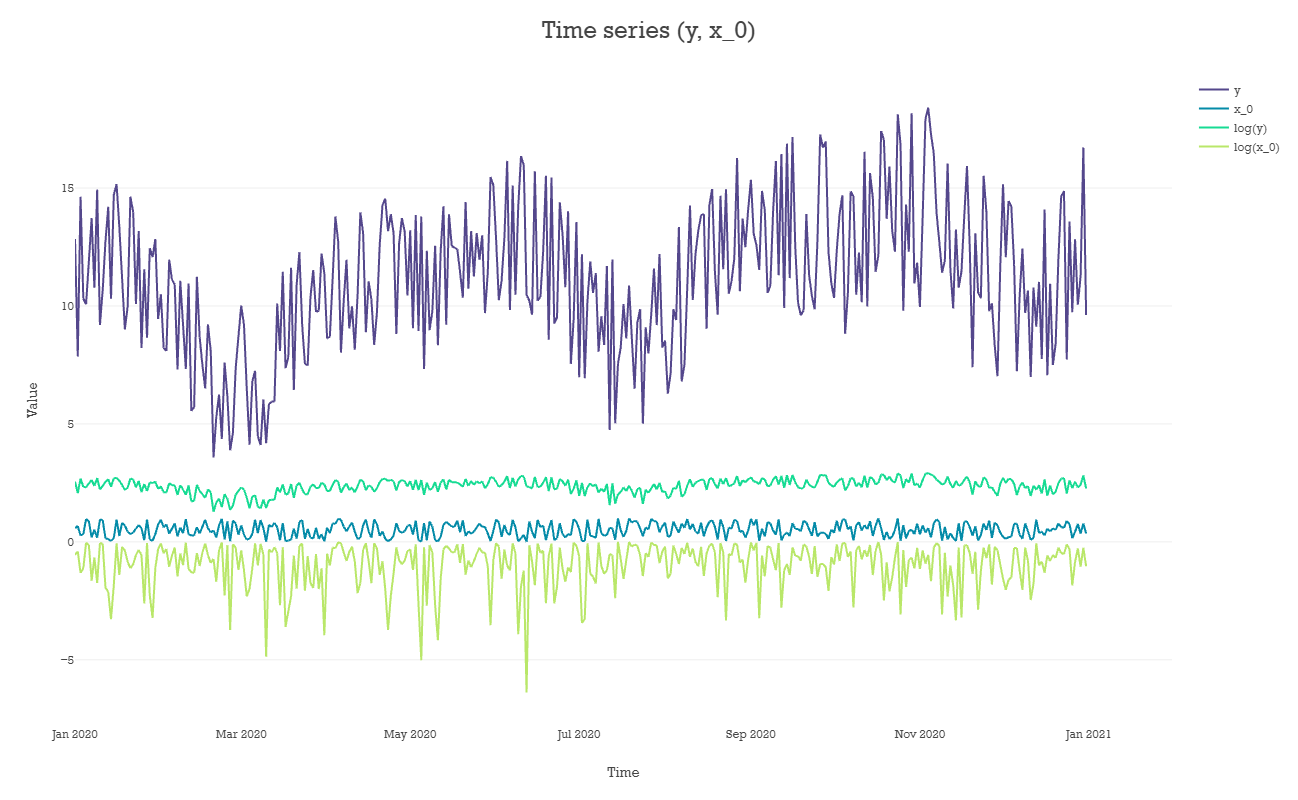

In [29]:
fig = time_series_plot(total_df, y_cols=["y", "x_0"], tf="log", keep_original=True)

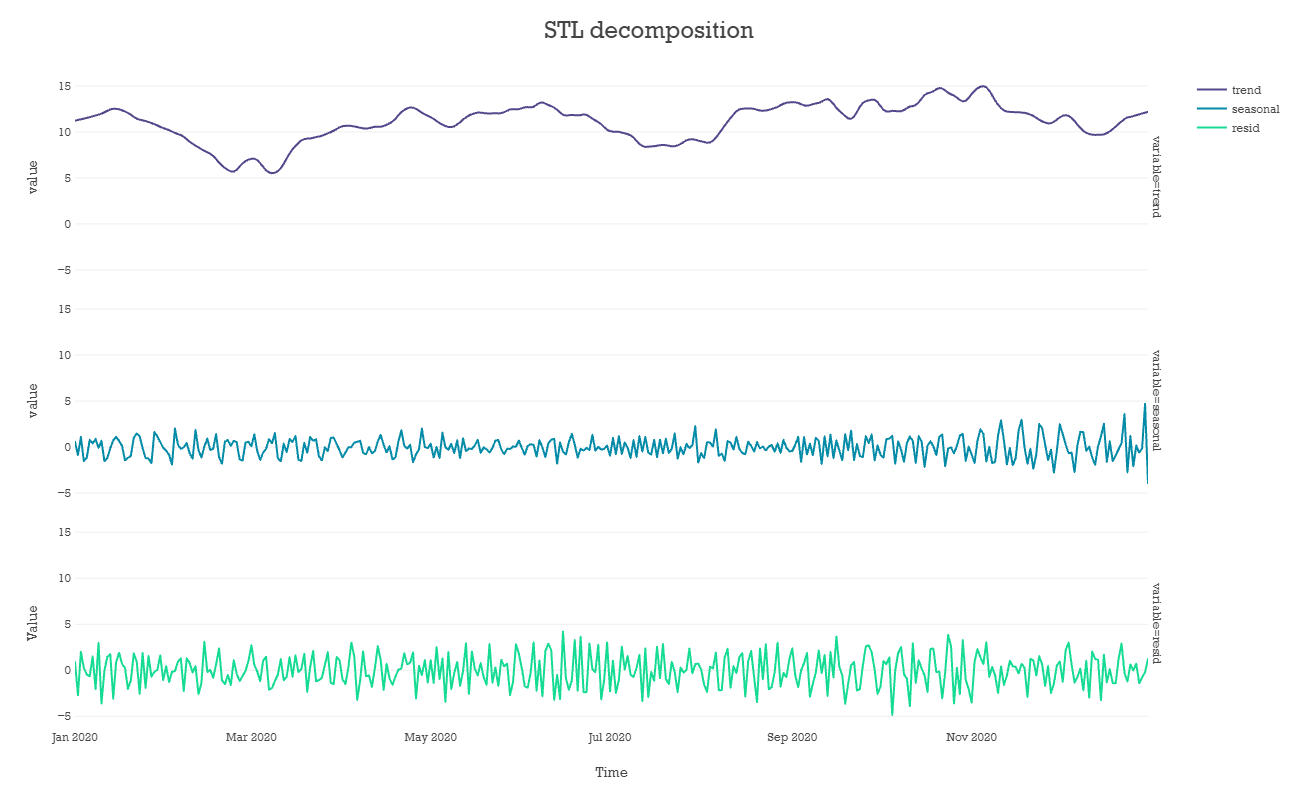

In [38]:
decomposed_time_series_plot(ts, method = "STL", subplots = True)

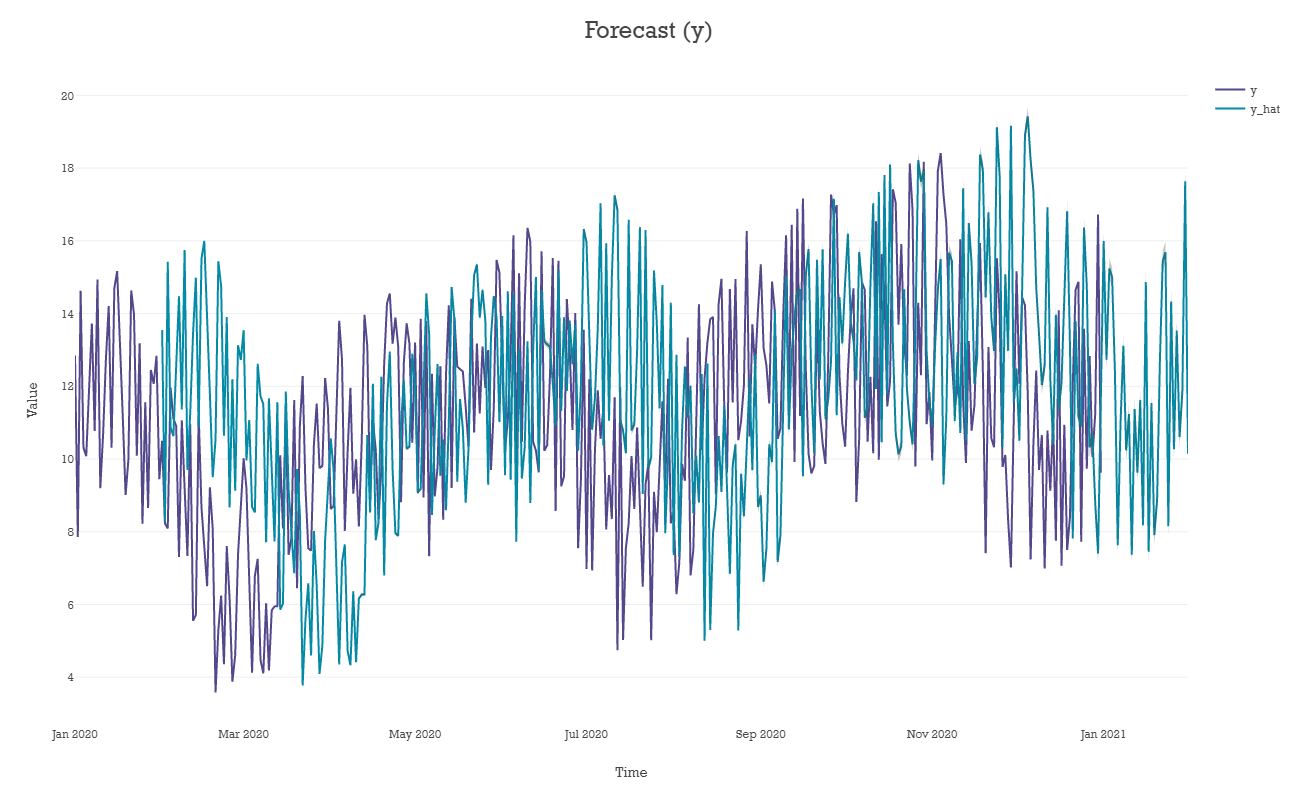

In [15]:
inverted_df = pd.DataFrame(total_df.values[::-1], total_df.index, total_df.columns)
#forecast_plot(inverted_df, ts_col = "y", fc_cols = ["y_hat"], lower_col = "lower confidence", upper_col = "upper confidence")

y_hat_2 = pd.Series(data=y_hat*0.9, index = ext_t_axis, name = "y_hat_2")
multiple_fc_df = pd.concat([total_df, y_hat_2], axis = 1)
forecast_plot(multiple_fc_df, ts_col = "y", fc_cols = ["y_hat"], upper_col = "upper confidence", lower_col = "lower confidence")

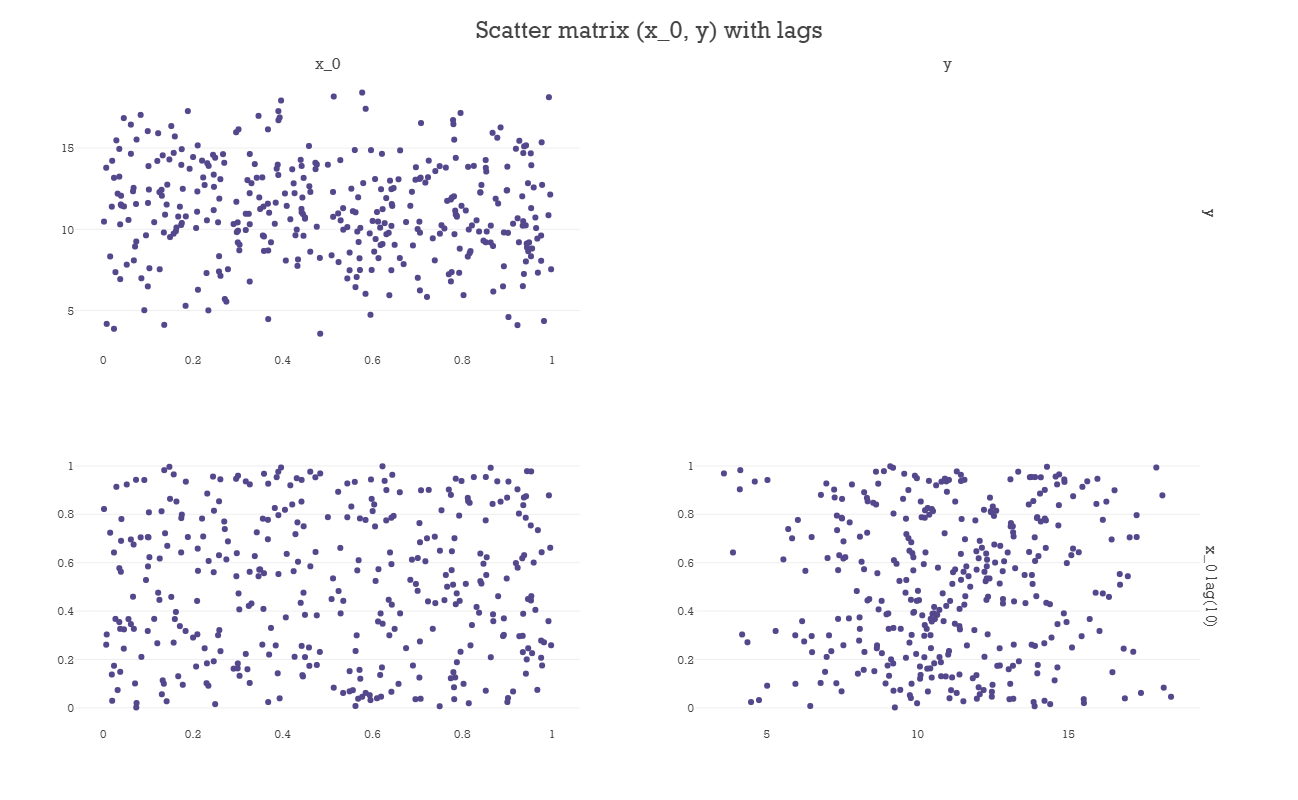

In [16]:
vars_scatterplot(total_df, var1 = "x_0", var2="y", lags1 = [10])

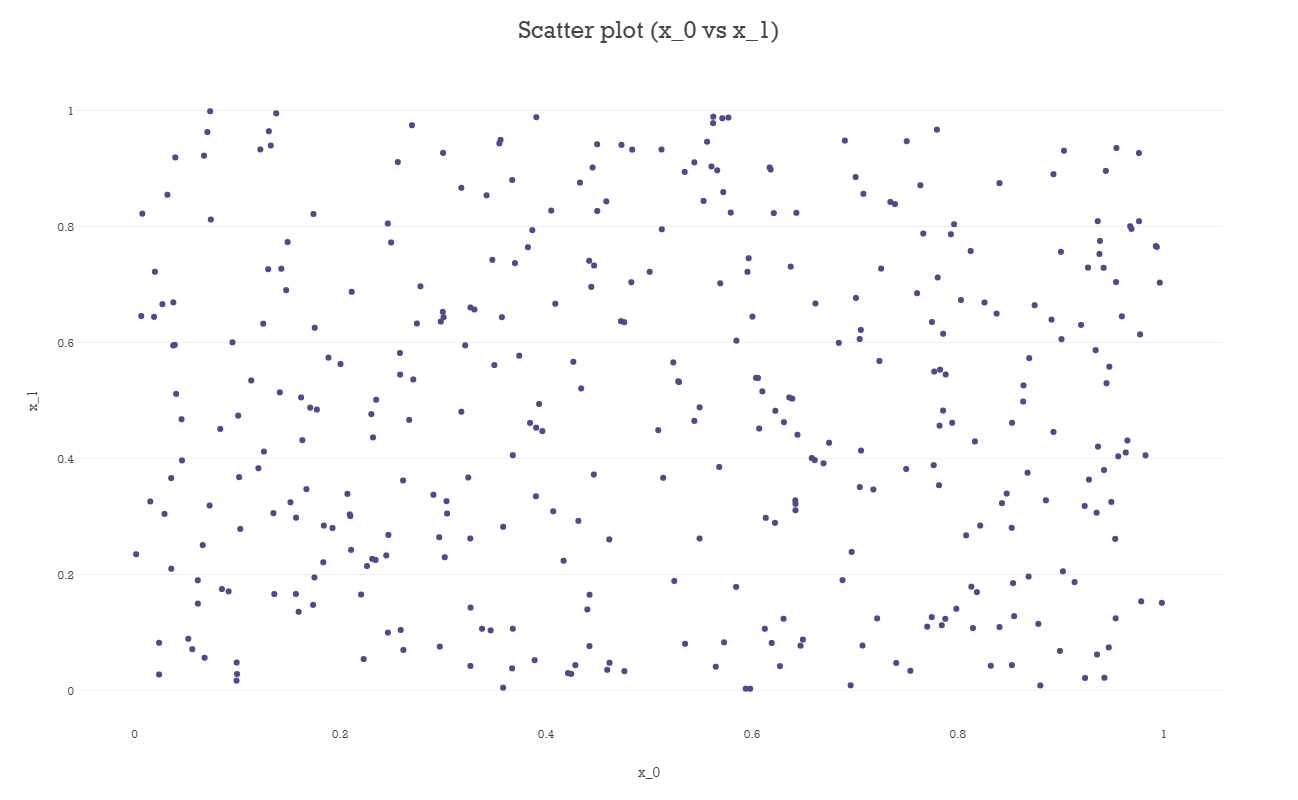

In [17]:
scatterplot(total_df, "x_0", "x_1", show_stats_summary = False)

c:\users\gabrieleorlandi\anaconda3\envs\pytsviz-mrya9sxp-py3.8\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.



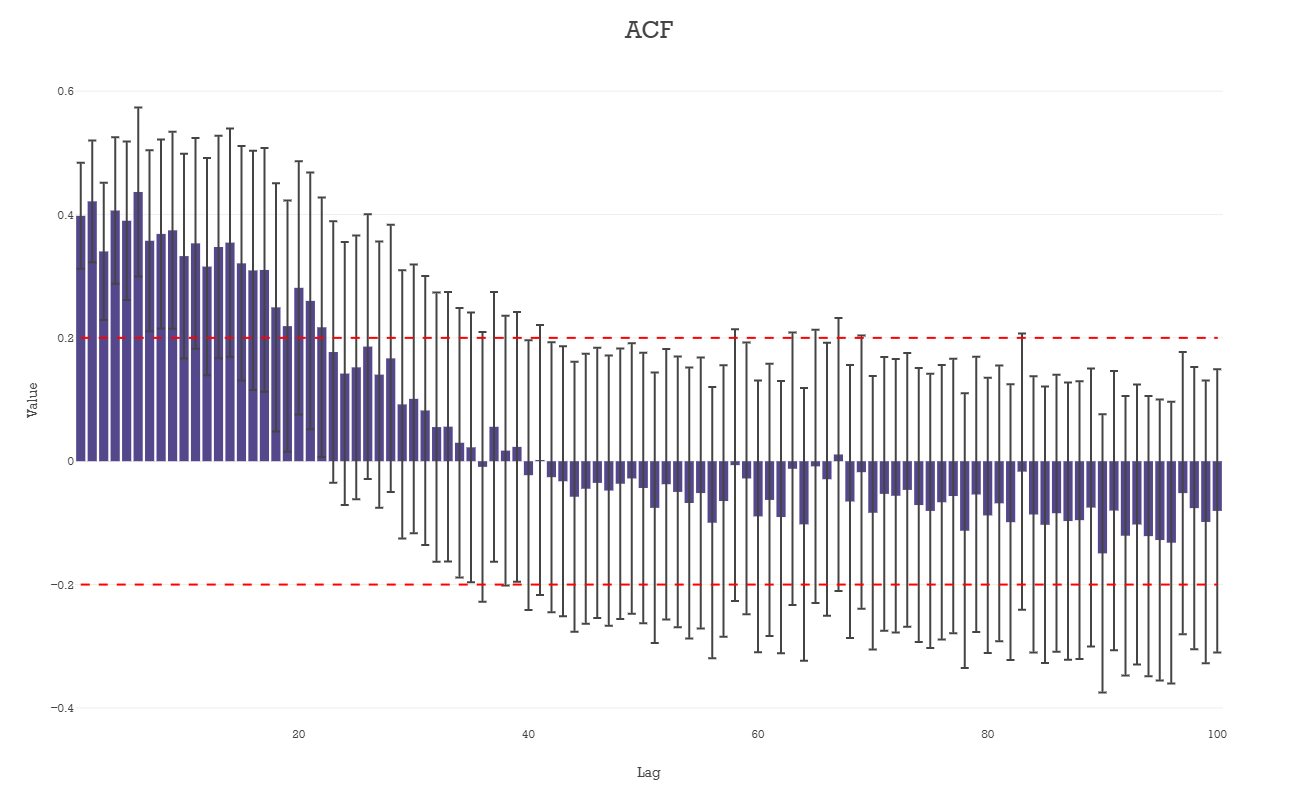

In [18]:
plotly_acf(y, 100, alpha = 0.1, show_threshold = True)

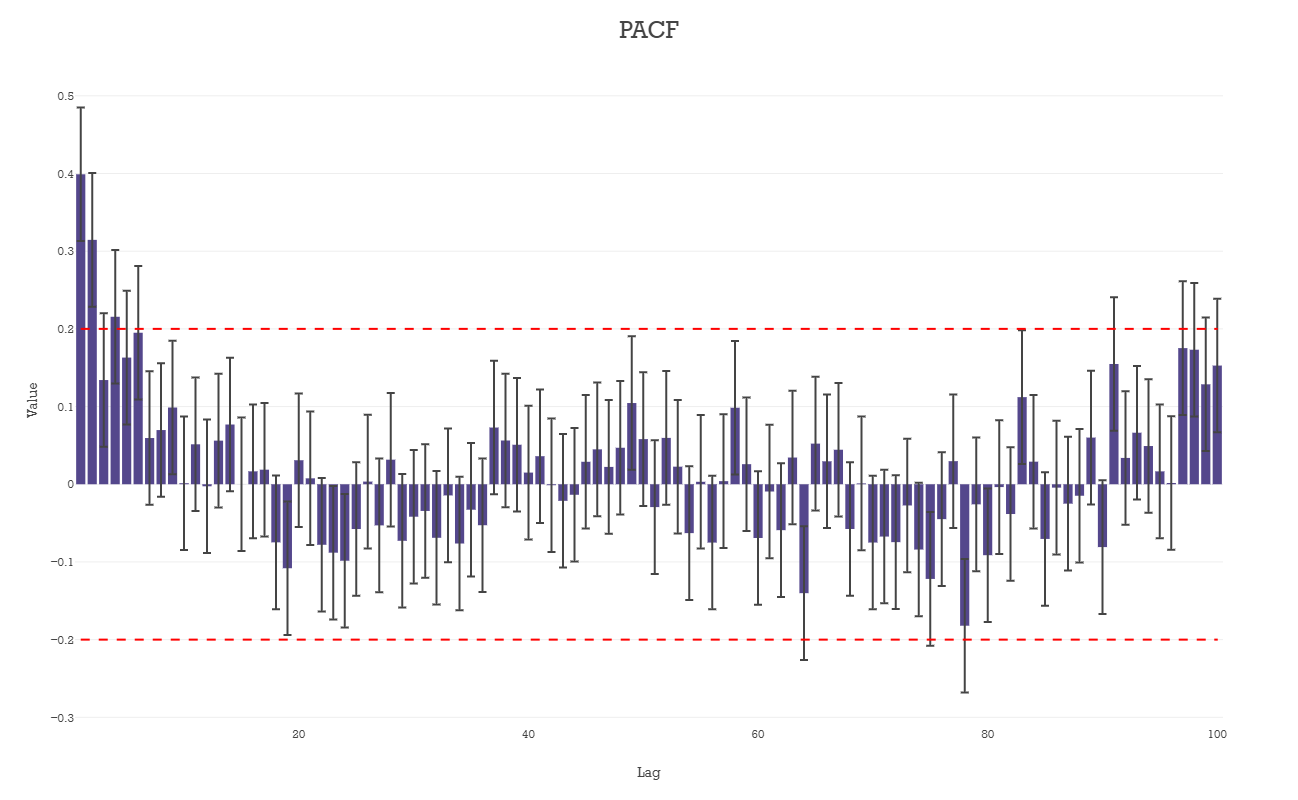

In [19]:
plotly_pacf(y, 100, alpha = 0.1, show_threshold = True)

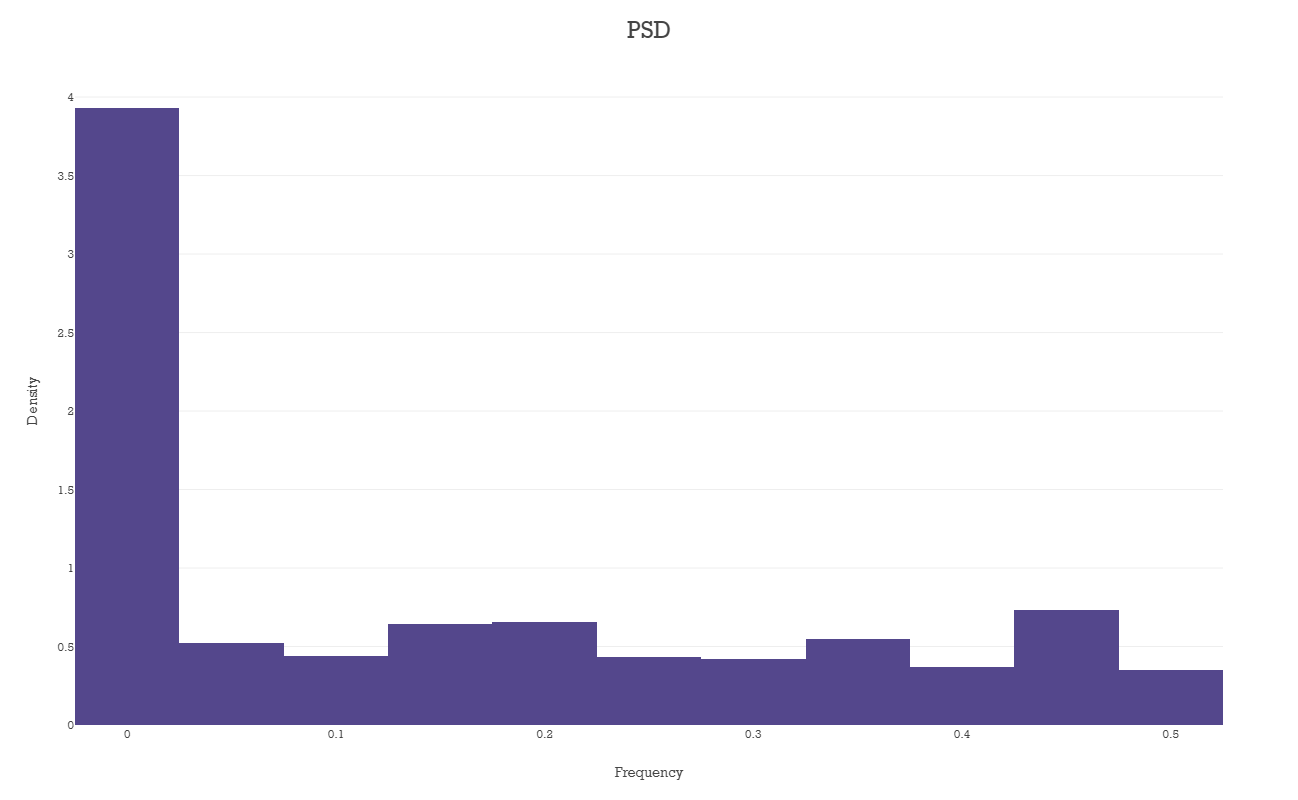

In [20]:
plotly_psd(y, scaling="spectrum")

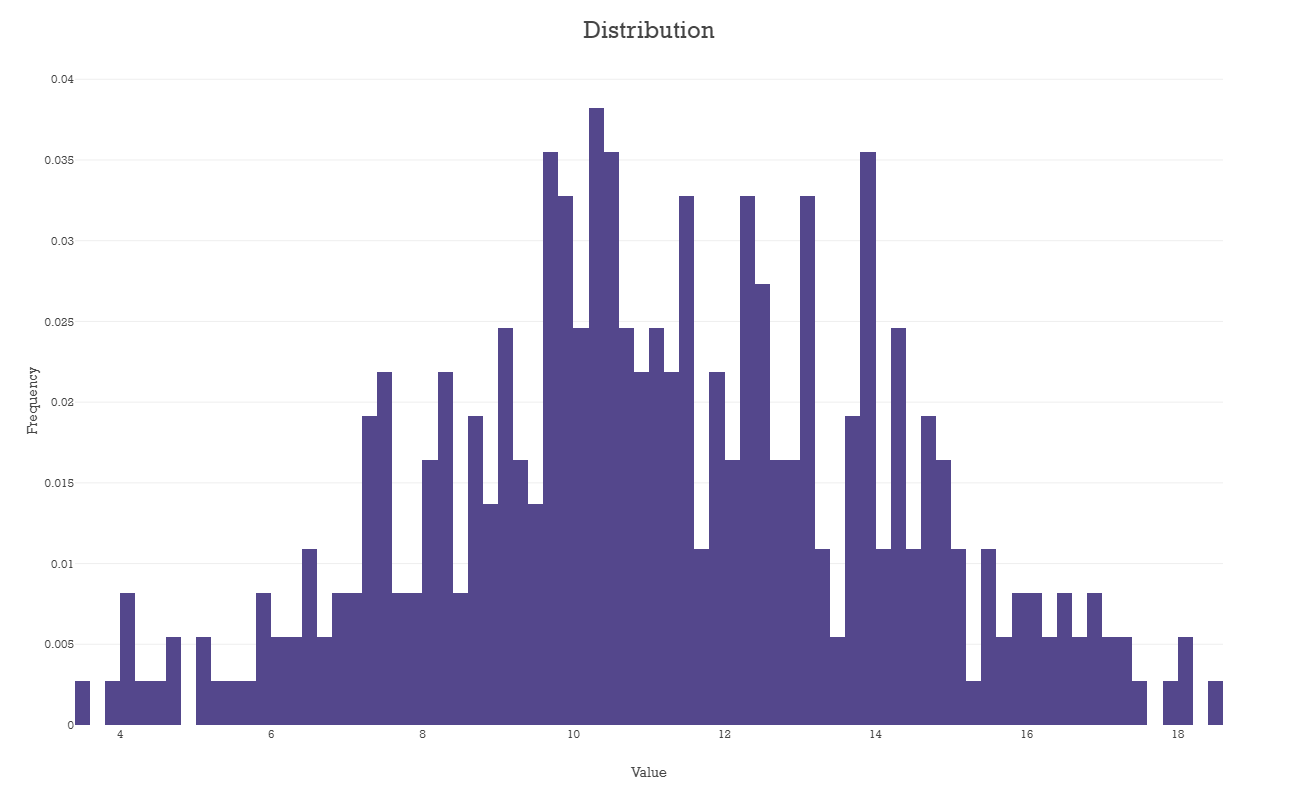

In [21]:
plot_distribution_histogram(ts, bins=100, title="Distribution")

In [22]:
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
arma_process = sm.tsa.ArmaProcess(ar, ma)

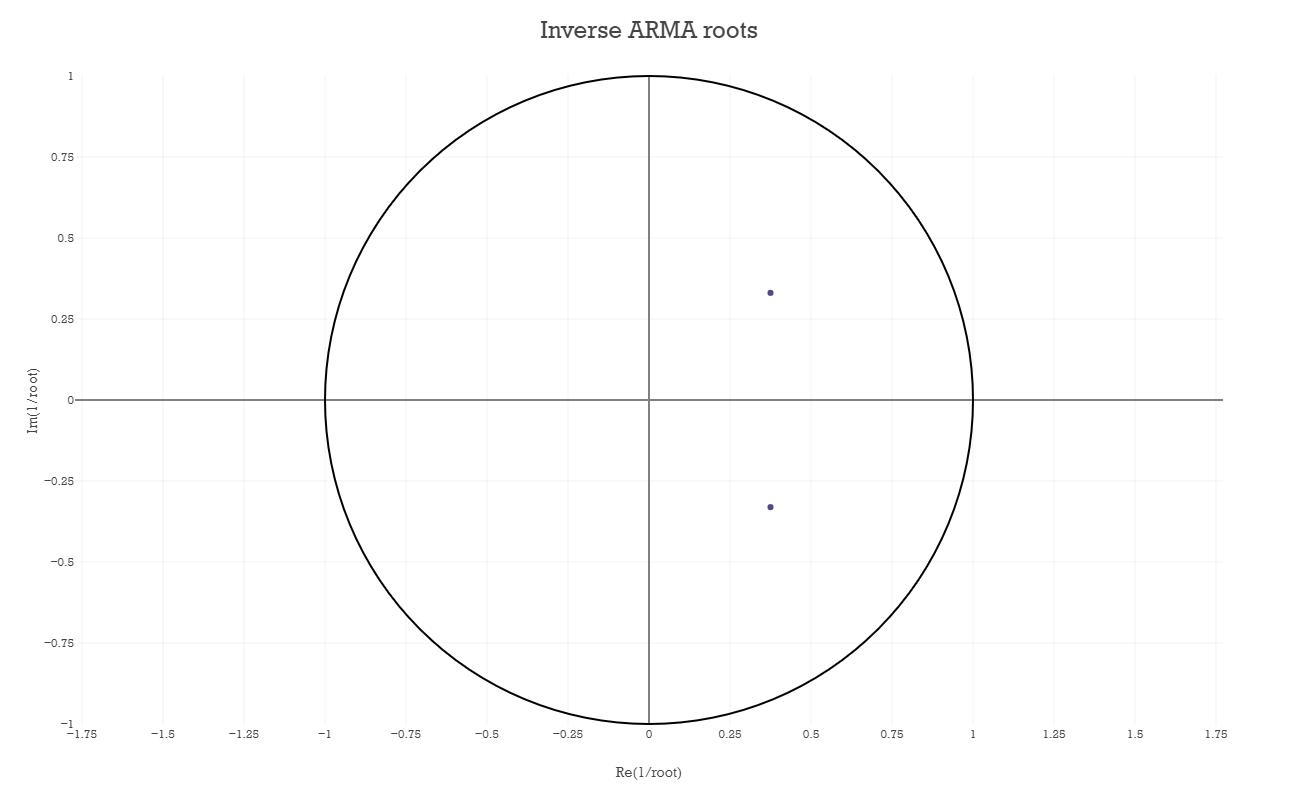

In [23]:
inverse_arma_roots_plot(arma_process)

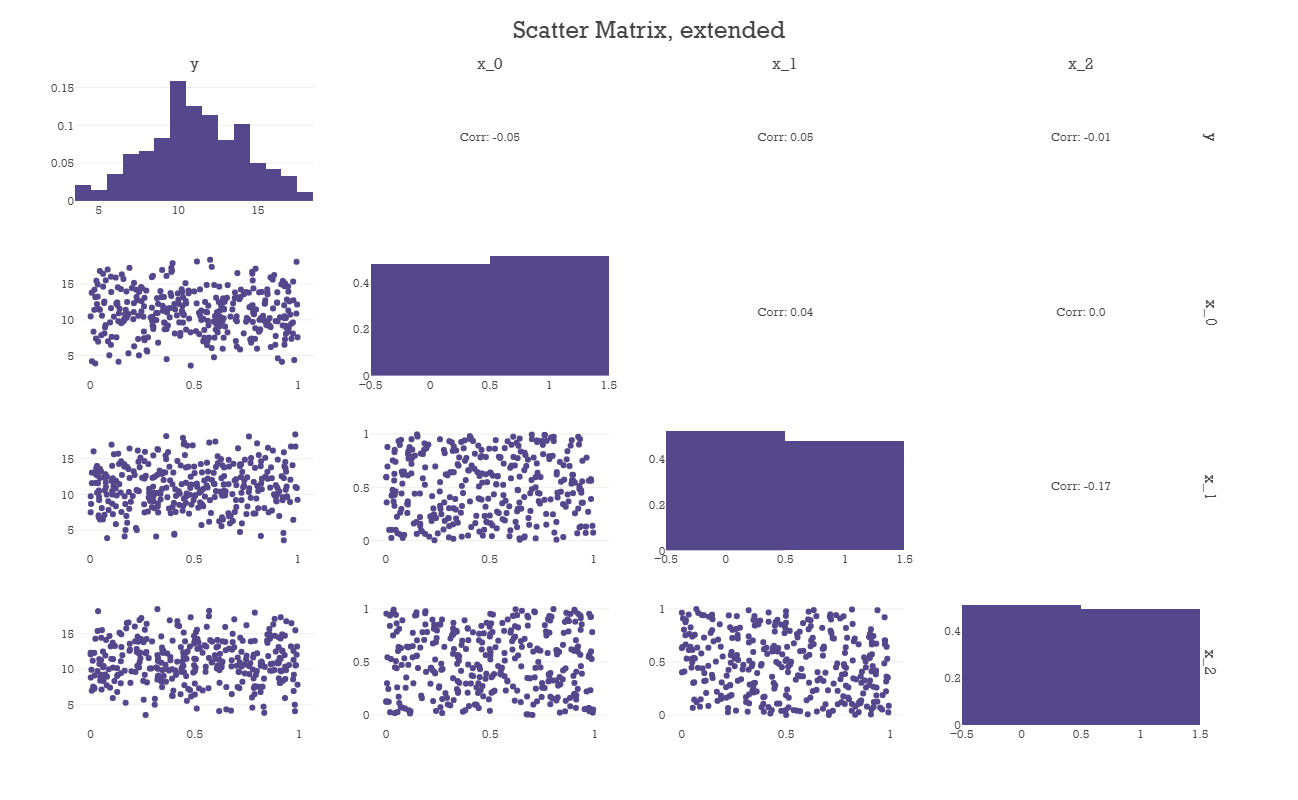

In [24]:
composite_matrix_scatterplot(total_df.dropna(), y_cols=["y", "x_0", "x_1", "x_2"])

c:\users\gabrieleorlandi\anaconda3\envs\pytsviz-mrya9sxp-py3.8\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning:

invalid value encountered in sqrt



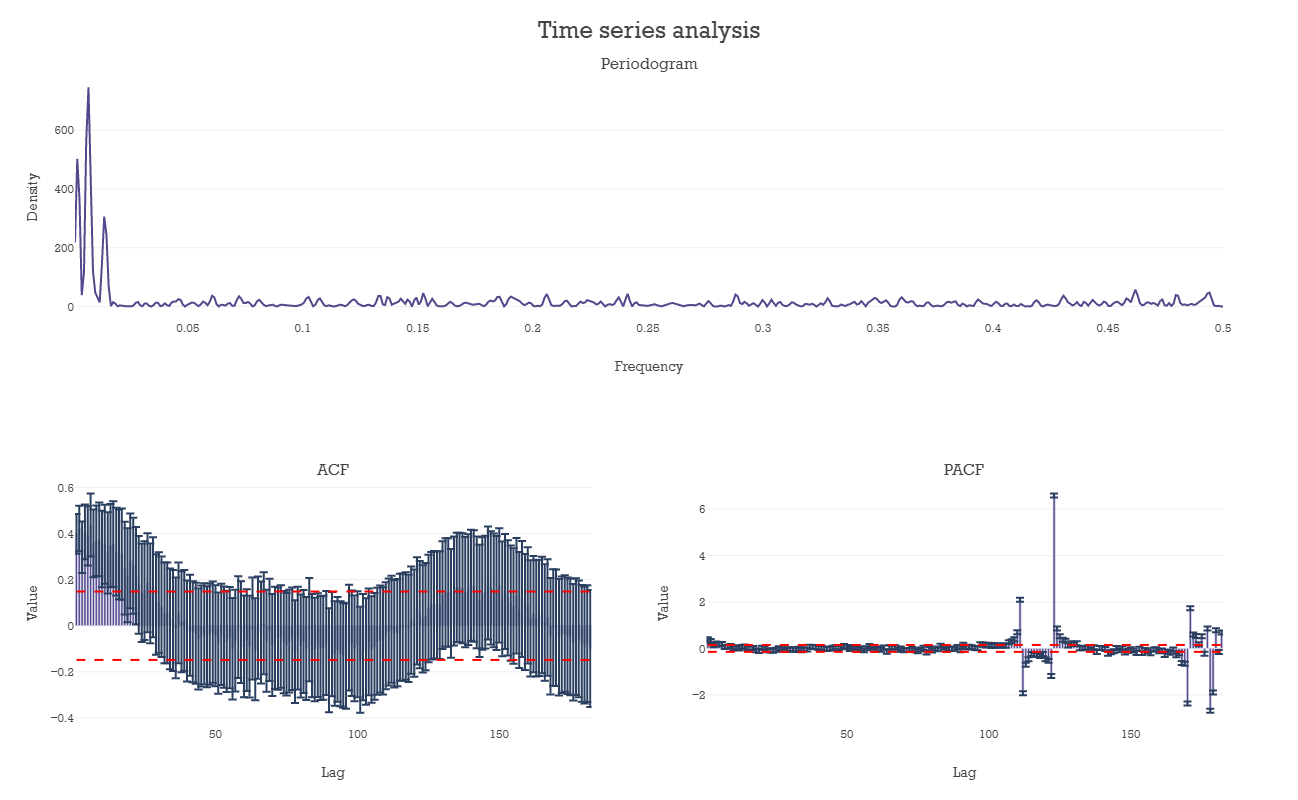

In [30]:
plotly_tsdisplay(ts)

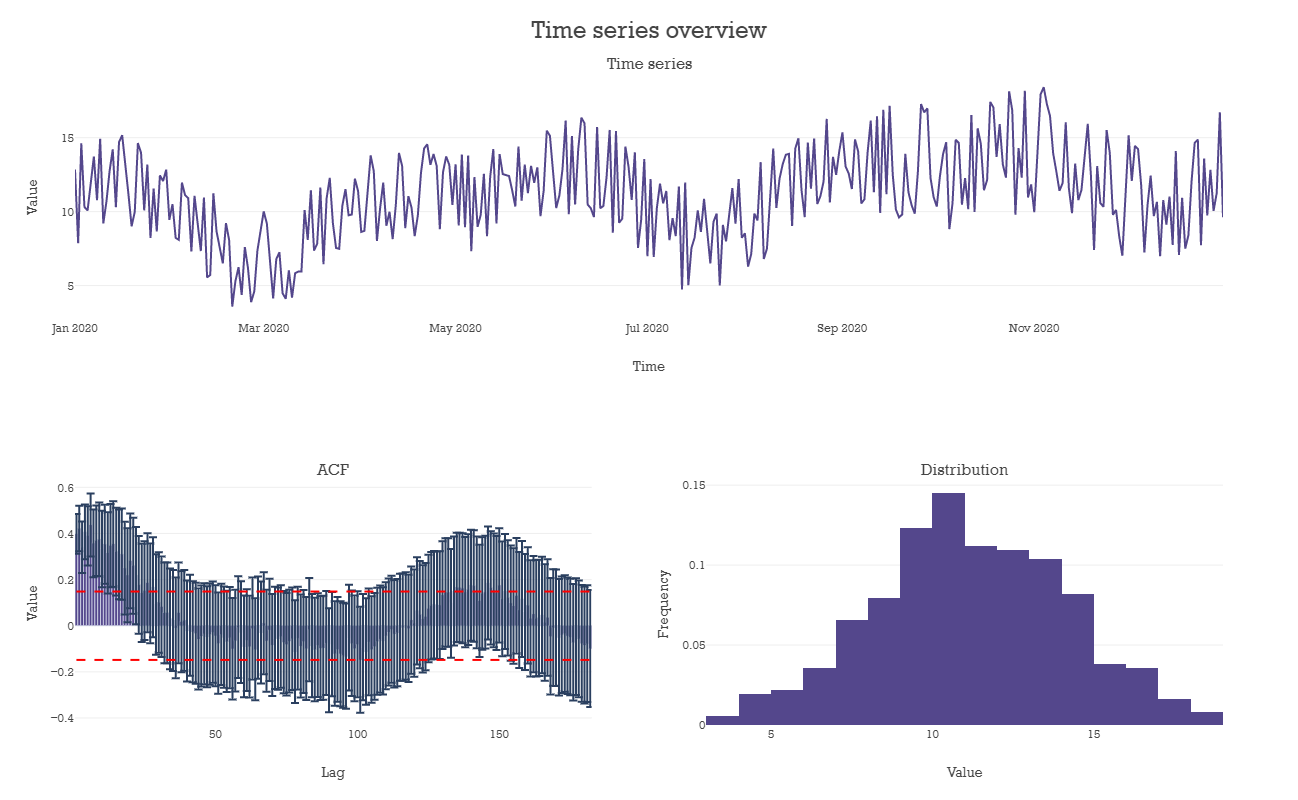

In [26]:
composite_summary_plot(ts)

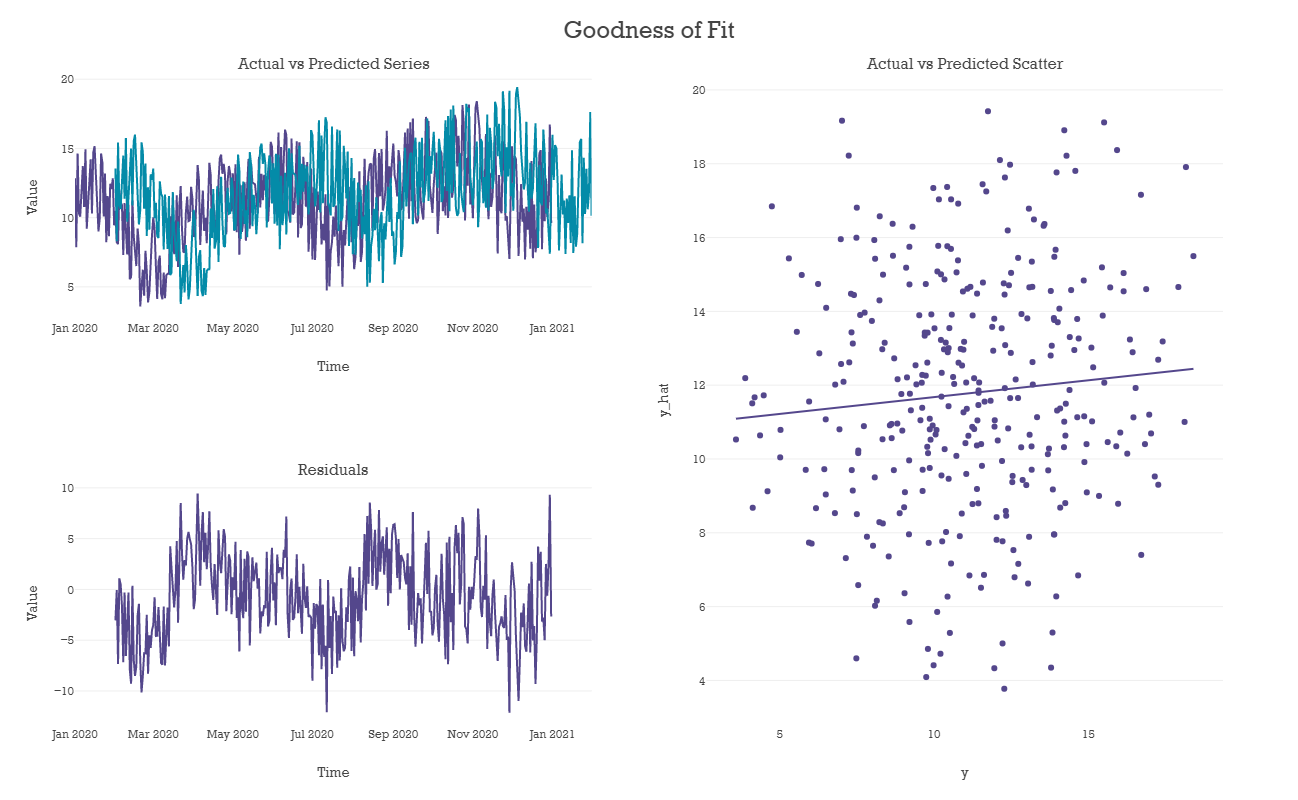

In [27]:
plot_gof(total_df, "y", "y_hat")